In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/tracks.csv', parse_dates=['release_date'])

In [3]:
# Conseguindo o valor da música mais nova no dataset de features
last_song_date = df['release_date'].max().date()
last_song_date

datetime.date(2021, 4, 16)

In [4]:
df.loc[df['popularity'] == df['popularity'].max()].artists

93802    ['Justin Bieber', 'Daniel Caesar', 'Giveon']
Name: artists, dtype: object

In [5]:
entries = pd.read_csv('data/billboard_hot_100.csv')

In [6]:
### Juntar todos os dataframes e calcular os pontos pra poder unir com o dataset de features
entries

,name,artist,rank,weeks,date
0,All I Want For Christmas Is You,Mariah Carey,1,50,2022-01-01
1,Rockin' Around The Christmas Tree,Brenda Lee,2,44,2022-01-01
2,Jingle Bell Rock,Bobby Helms,3,41,2022-01-01
3,A Holly Jolly Christmas,Burl Ives,4,25,2022-01-01
4,Easy On Me,Adele,5,11,2022-01-01
...,...,...,...,...,...
330882,Down In Virginia,Jimmy Reed,96,1,1958-08-09
330883,Sunday Barbecue,Tennessee Ernie Ford,97,1,1958-08-09
330884,Gotta Have Rain,Eydie Gorme,98,2,1958-08-09
330885,Nothing In The World,Nat King Cole,99,1,1958-08-09


In [7]:
# Agrupando as músicas que aparecem mais somando sua pontuação
sanitized_entries = entries.groupby(['name', 'artist'], as_index=False)['weeks'].agg('max').sort_values('weeks', ascending=False).reset_index(drop=True)
sanitized_entries

,name,artist,weeks
0,Blinding Lights,The Weeknd,90
1,Radioactive,Imagine Dragons,87
2,Sail,AWOLNATION,79
3,I'm Yours,Jason Mraz,76
4,How Do I Live,LeAnn Rimes,69
...,...,...,...
29760,One,Mary J. Blige,1
29761,The Magic Of Our Summer Love,The Tymes,1
29762,Same Thing,Lil Baby,1
29763,I'm Coming Home,Paul Anka,1


In [8]:
sanitized_entries.dtypes

name      object
artist    object
weeks      int64
dtype: object

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='weeks', ylabel='Count'>

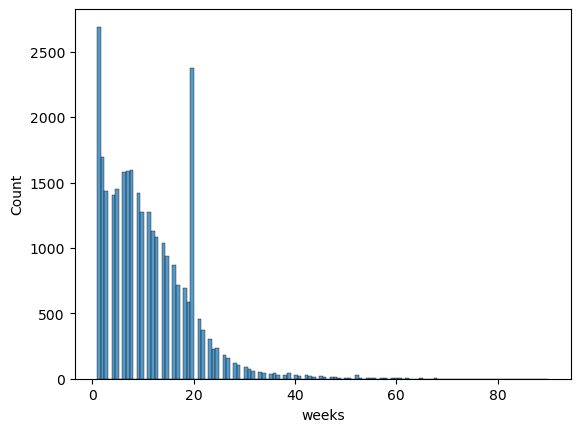

In [18]:
sns.histplot(data=sanitized_entries, x='weeks')

In [9]:
# Pelo gráfico é possível observar que a mediana é uma medida de centralização muito melhor 
# que a média neste caso.
sanitized_entries['weeks'].median()

10.0

In [10]:
# Coluna de artistas é uma string e não uma lista de strings
df.dtypes

id                          object
name                        object
popularity                   int64
duration_ms                  int64
explicit                     int64
artists                     object
id_artists                  object
release_date        datetime64[ns]
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
time_signature               int64
dtype: object

In [11]:
# Tratando a string como lista
from ast import literal_eval
df['artist'] = df['artists'].apply(lambda x: literal_eval(x)[0])

In [12]:

df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,Uli
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,Fernando Pessoa
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,Ignacio Corsini
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,Ignacio Corsini
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,Dick Haymes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,阿YueYue
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,ROLE MODEL
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,FINNEAS
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,Gentle Bones


In [13]:
# Por alguma razão, algumas músicas aparecem repetidas diversas vezes, portanto é necessario filtra-las
merged_df = pd.merge(df, sanitized_entries, how='left', on=['name', 'artist']).drop(columns=['id', 'artists', 'id_artists', 'popularity','time_signature']).drop_duplicates(['name', 'artist'], keep='first').reset_index(drop=True)
merged_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,weeks
0,Carve,126903,0,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,Uli,NaN
1,Capítulo 2.16 - Banquero Anarquista,98200,0,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,Fernando Pessoa,NaN
2,Vivo para Quererte - Remasterizado,181640,0,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,Ignacio Corsini,NaN
3,El Prisionero - Remasterizado,176907,0,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,Ignacio Corsini,NaN
4,Lady of the Evening,163080,0,1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,Dick Haymes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523461,Skyscraper,106002,0,2020-02-08,0.626,0.5300,5,-13.117,0,0.0284,0.113,0.856000,0.1040,0.2150,120.113,Emilie Chin,NaN
523462,云与海,258267,0,2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,阿YueYue,NaN
523463,blind,153293,0,2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,ROLE MODEL,NaN
523464,What They'll Say About Us,187601,0,2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,FINNEAS,NaN


In [14]:
billboard_entries_df = merged_df[~merged_df['weeks'].isna()].reset_index(drop=True)
billboard_entries_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,weeks
0,White Christmas,177480,0,1942-01-01,0.317,0.158,9,-16.485,1,0.0381,0.67300,0.353000,0.3380,0.247,130.503,Bing Crosby,24.0
1,Ain't No Sunshine,124120,0,1942-01-01,0.523,0.373,9,-12.990,0,0.0932,0.44600,0.000011,0.1030,0.493,79.855,Bill Withers,16.0
2,Mele Kalikimaka (Merry Christmas),175333,0,1945-01-01,0.500,0.224,3,-12.431,1,0.0935,0.64600,0.000000,0.2840,0.620,202.481,Bing Crosby,1.0
3,I'll Be Home For Christmas,175173,0,1945-01-01,0.223,0.146,4,-16.084,0,0.0321,0.28100,0.000000,0.2560,0.176,84.041,Bing Crosby,1.0
4,The Children's Marching Song (Nick Nack Paddy ...,166867,0,1950-01-01,0.712,0.856,2,-9.457,1,0.0332,0.63600,0.000000,0.1680,0.934,97.431,Mitch Miller,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10038,I Love It,156773,0,2012-01-01,0.710,0.901,1,-2.686,1,0.0296,0.00828,0.000013,0.1720,0.860,125.953,Icona Pop,29.0
10039,Ricky,154693,0,1988-10-18,0.525,0.668,4,-12.278,1,0.0920,0.06270,0.000000,0.4430,0.973,153.811,"""Weird Al"" Yankovic",8.0
10040,Love At First Sight,276440,0,1990-01-01,0.620,0.608,10,-8.665,1,0.0294,0.31800,0.000000,0.0809,0.566,115.826,Styx,16.0
10041,Waiting For Love,278173,0,1990-01-01,0.615,0.537,7,-10.728,1,0.0282,0.27800,0.000000,0.1640,0.494,111.581,Alias,17.0


In [15]:
total_in_billboard = len(billboard_entries_df)
total_in_billboard

10043

In [16]:
sanitized_merged_df = merged_df[merged_df['weeks'].isna()].reset_index(drop=True)
sanitized_merged_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,weeks
0,Carve,126903,0,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,Uli,NaN
1,Capítulo 2.16 - Banquero Anarquista,98200,0,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,Fernando Pessoa,NaN
2,Vivo para Quererte - Remasterizado,181640,0,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,Ignacio Corsini,NaN
3,El Prisionero - Remasterizado,176907,0,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,Ignacio Corsini,NaN
4,Lady of the Evening,163080,0,1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,Dick Haymes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513418,Skyscraper,106002,0,2020-02-08,0.626,0.5300,5,-13.117,0,0.0284,0.113,0.856000,0.1040,0.2150,120.113,Emilie Chin,NaN
513419,云与海,258267,0,2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,阿YueYue,NaN
513420,blind,153293,0,2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,ROLE MODEL,NaN
513421,What They'll Say About Us,187601,0,2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,FINNEAS,NaN


In [17]:
samples_df = sanitized_merged_df.sample(n=total_in_billboard)
samples_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,weeks
393099,Wij Zijn De Jongens Van De Bouw,219800,0,1992-01-01,0.752,0.786,9,-9.810,1,0.1190,0.4410,0.000100,0.0635,0.550,87.941,Bertus Staigerpaip,NaN
491433,紙様,199627,0,2018-04-11,0.677,0.976,7,-2.902,1,0.1380,0.2000,0.000000,0.2520,0.744,136.922,Creepy Nuts,NaN
62348,Hey Pachuco!,214107,0,1996-06-25,0.600,0.791,7,-6.484,0,0.0622,0.0246,0.099600,0.0796,0.317,137.588,Royal Crown Revue,NaN
509968,"Vem är det som låter?, del 4",61360,0,2006-01-01,0.772,0.170,11,-14.361,0,0.9340,0.9180,0.000000,0.1430,0.177,56.608,Lilla Spöket Laban och hans vänner,NaN
85102,"Noah: Me and You, Lord",181307,0,1963-01-01,0.561,0.673,8,-11.158,1,0.9450,0.9250,0.000000,0.2440,0.592,62.984,Bill Cosby,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446421,Kimegyek a temetőbe,227000,0,2011-11-01,0.644,0.955,0,-5.944,0,0.1900,0.1240,0.000000,0.0246,0.771,159.872,MC Hawer,NaN
446930,Hagyj El!,223600,0,2014-02-04,0.907,0.749,2,-6.171,0,0.0329,0.1530,0.000000,0.1860,0.745,109.982,Horváth Tamás,NaN
59966,No Me Importa,173653,0,1993-01-01,0.695,0.595,7,-5.764,1,0.0341,0.3450,0.000009,0.3660,0.916,79.945,Los Rehenes,NaN
70238,Stop This Train,285053,0,2006-09-11,0.619,0.437,7,-11.756,1,0.0314,0.4650,0.006090,0.0971,0.406,89.511,John Mayer,NaN


In [18]:
concatenated_df = pd.concat([billboard_entries_df, samples_df]).reset_index(drop=True)
# concatenated_df.columns
concatenated_df['weeks'].fillna(0, inplace=True)
concatenated_df["release_date"] = concatenated_df["release_date"].dt.year
concatenated_df

,name,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist,weeks
0,White Christmas,177480,0,1942,0.317,0.158,9,-16.485,1,0.0381,0.673,0.353000,0.3380,0.247,130.503,Bing Crosby,24.0
1,Ain't No Sunshine,124120,0,1942,0.523,0.373,9,-12.990,0,0.0932,0.446,0.000011,0.1030,0.493,79.855,Bill Withers,16.0
2,Mele Kalikimaka (Merry Christmas),175333,0,1945,0.500,0.224,3,-12.431,1,0.0935,0.646,0.000000,0.2840,0.620,202.481,Bing Crosby,1.0
3,I'll Be Home For Christmas,175173,0,1945,0.223,0.146,4,-16.084,0,0.0321,0.281,0.000000,0.2560,0.176,84.041,Bing Crosby,1.0
4,The Children's Marching Song (Nick Nack Paddy ...,166867,0,1950,0.712,0.856,2,-9.457,1,0.0332,0.636,0.000000,0.1680,0.934,97.431,Mitch Miller,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,Kimegyek a temetőbe,227000,0,2011,0.644,0.955,0,-5.944,0,0.1900,0.124,0.000000,0.0246,0.771,159.872,MC Hawer,0.0
20082,Hagyj El!,223600,0,2014,0.907,0.749,2,-6.171,0,0.0329,0.153,0.000000,0.1860,0.745,109.982,Horváth Tamás,0.0
20083,No Me Importa,173653,0,1993,0.695,0.595,7,-5.764,1,0.0341,0.345,0.000009,0.3660,0.916,79.945,Los Rehenes,0.0
20084,Stop This Train,285053,0,2006,0.619,0.437,7,-11.756,1,0.0314,0.465,0.006090,0.0971,0.406,89.511,John Mayer,0.0


In [19]:
filtered_data = concatenated_df[concatenated_df['weeks'] != 0]

# Get the count of songs with weeks different than 0 for each artist
song_count = filtered_data['artist'].value_counts()
song_count

Drake                         91
Taylor Swift                  82
Justin Bieber                 52
The Weeknd                    42
Stevie Wonder                 42
                              ..
The Friends Of Distinction     1
Zendaya                        1
MAGIC!                         1
Herbie Mann                    1
Krewella                       1
Name: artist, Length: 2920, dtype: int64

<AxesSubplot:>

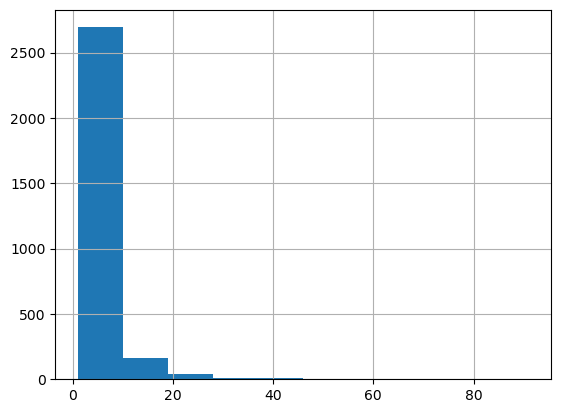

In [20]:
song_count.hist()

In [21]:
# Function to define categories for number of songs that an artist has in the billboard if any
def get_category(x):
    if x > 20:
        return 'Superstar'
    elif x > 10:
        return "Trendsetting"
    elif x > 5:
        return "Hitmaker"
    elif x > 3:
        return "Notable"
    else:
        return "Newcomer"

## Hit song approach

In [23]:
hit_song_df = concatenated_df.copy()
### if it appears once in billboard hot 100 then it's a hit
hit_song_df['hit'] = hit_song_df['weeks'].apply(lambda x: 1 if x else 0)

# hit_song_df['artist'] = hit_song_df['weeks'].apply(get_category)

# Function to get the category of the artist
def get_artist_category(row, song_count=song_count):
    if row['artist'] not in song_count.index:
        return 'Unknown'
    else:
        return get_category(song_count[row['artist']])

# hit_song_df['artist_category'] = hit_song_df.apply(lambda x: get_artist_category(x), axis=1)

# dummiees for most successful artists
# artist_dummies = pd.get_dummies(hit_song_df['artist_category'])
# hit_song_df = hit_song_df.drop(columns=['weeks', "name", "artist", "artist_category"])
current_year = 2023
hit_song_df['years_since_release'] = current_year - hit_song_df['release_year']
hit_song_df = hit_song_df.drop(columns=['weeks', "name", "artist"])
# hit_song_df['artist_category'].value_counts()
hit_song_df

,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,hit
0,177480,0,1942,0.317,0.158,9,-16.485,1,0.0381,0.673,0.353000,0.3380,0.247,130.503,1
1,124120,0,1942,0.523,0.373,9,-12.990,0,0.0932,0.446,0.000011,0.1030,0.493,79.855,1
2,175333,0,1945,0.500,0.224,3,-12.431,1,0.0935,0.646,0.000000,0.2840,0.620,202.481,1
3,175173,0,1945,0.223,0.146,4,-16.084,0,0.0321,0.281,0.000000,0.2560,0.176,84.041,1
4,166867,0,1950,0.712,0.856,2,-9.457,1,0.0332,0.636,0.000000,0.1680,0.934,97.431,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,227000,0,2011,0.644,0.955,0,-5.944,0,0.1900,0.124,0.000000,0.0246,0.771,159.872,0
20082,223600,0,2014,0.907,0.749,2,-6.171,0,0.0329,0.153,0.000000,0.1860,0.745,109.982,0
20083,173653,0,1993,0.695,0.595,7,-5.764,1,0.0341,0.345,0.000009,0.3660,0.916,79.945,0
20084,285053,0,2006,0.619,0.437,7,-11.756,1,0.0314,0.465,0.006090,0.0971,0.406,89.511,0


In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
hit_song_df, hit_song_test_df = train_test_split(hit_song_df, test_size=0.2, random_state=42)

In [24]:
hit_song_X = hit_song_df.drop('hit', axis=1)
hit_song_y = hit_song_df['hit']
hit_song_X

,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,177480,0,1942,0.317,0.158,9,-16.485,1,0.0381,0.673,0.353000,0.3380,0.247,130.503
1,124120,0,1942,0.523,0.373,9,-12.990,0,0.0932,0.446,0.000011,0.1030,0.493,79.855
2,175333,0,1945,0.500,0.224,3,-12.431,1,0.0935,0.646,0.000000,0.2840,0.620,202.481
3,175173,0,1945,0.223,0.146,4,-16.084,0,0.0321,0.281,0.000000,0.2560,0.176,84.041
4,166867,0,1950,0.712,0.856,2,-9.457,1,0.0332,0.636,0.000000,0.1680,0.934,97.431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,227000,0,2011,0.644,0.955,0,-5.944,0,0.1900,0.124,0.000000,0.0246,0.771,159.872
20082,223600,0,2014,0.907,0.749,2,-6.171,0,0.0329,0.153,0.000000,0.1860,0.745,109.982
20083,173653,0,1993,0.695,0.595,7,-5.764,1,0.0341,0.345,0.000009,0.3660,0.916,79.945
20084,285053,0,2006,0.619,0.437,7,-11.756,1,0.0314,0.465,0.006090,0.0971,0.406,89.511


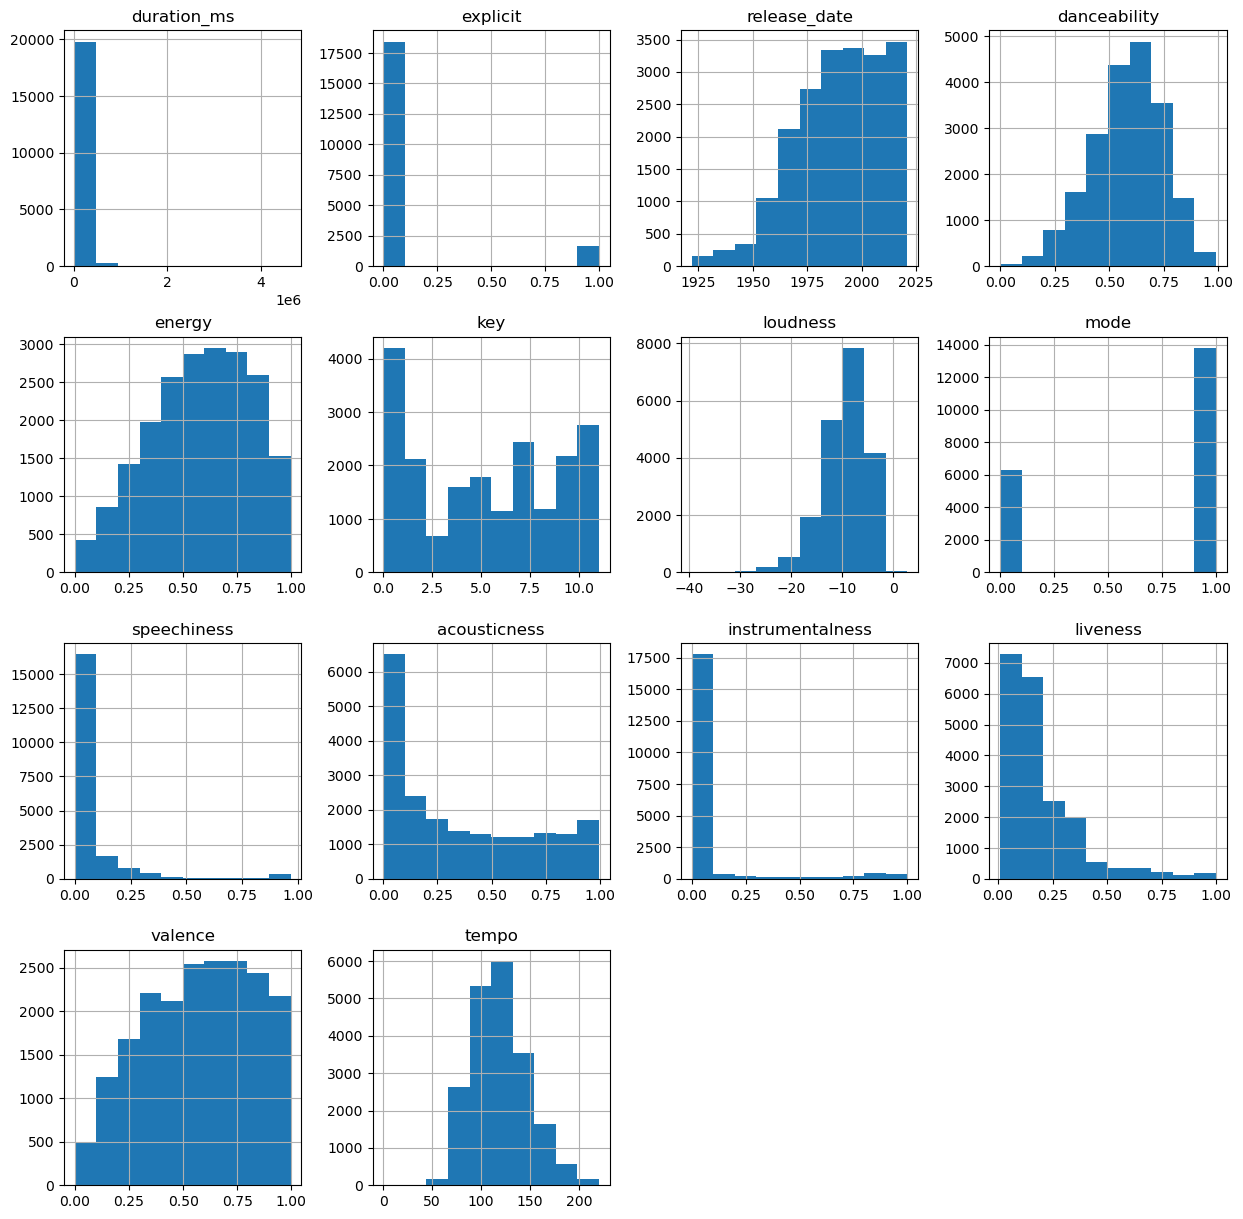

In [25]:
_ = pd.DataFrame.hist(data=hit_song_X, figsize=[15,15])

### Checking correlation so that we can drop features to prevent dimensionality curse

<AxesSubplot:>

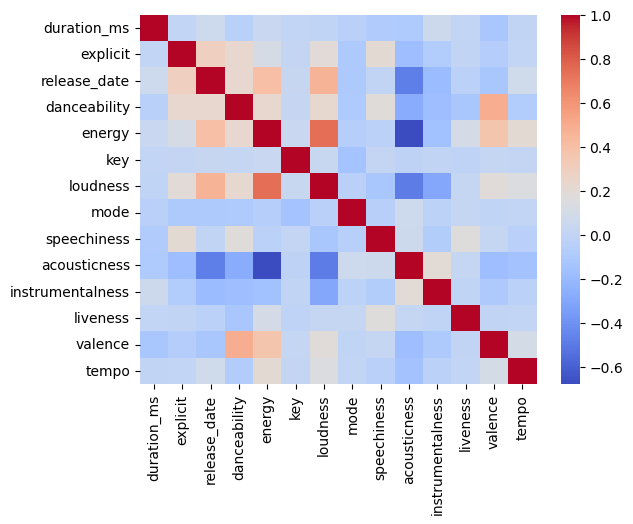

In [26]:
correlation_matrix = hit_song_X.corr()
import seaborn as sns

sns.heatmap(correlation_matrix, cmap="coolwarm")

In [27]:
corr_matrix = correlation_matrix[correlation_matrix != 1.0].dropna(axis=0, how='all').dropna(axis=1, how='all')
corr_pairs = corr_matrix.unstack()

# Sort the correlation pairs by their absolute value in descending order
sorted_pairs = corr_pairs.abs().sort_values(ascending=False)
sorted_pairs

energy            loudness            0.741171
loudness          energy              0.741171
energy            acousticness        0.680570
acousticness      energy              0.680570
loudness          acousticness        0.496227
                                        ...   
acousticness      acousticness             NaN
instrumentalness  instrumentalness         NaN
liveness          liveness                 NaN
valence           valence                  NaN
tempo             tempo                    NaN
Length: 196, dtype: float64

In [28]:
# dropping one of the correlated features that has a correlation coefficient of 0.7 or higher
# hit_song_X = hit_song_X.drop(columns=['loudness'])

## Applying models

In [30]:
import numpy as np
from scipy import stats
from sklearn.discriminant_analysis import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline


scaler = StandardScaler()
selector = SelectKBest(score_func=mutual_info_classif, k=20)
rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=2023)


In [31]:
# Testing adding artists again
# hit_song_X = pd.concat([hit_song_X, artist_dummies], axis=1)
# hit_song_X

,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Hitmaker,Newcomer,Notable,Superstar,Trendsetting,Unknown
0,177480,0,1942,0.317,0.158,9,-16.485,1,0.0381,0.673,0.353000,0.3380,0.247,130.503,0,1,0,0,0,0
1,124120,0,1942,0.523,0.373,9,-12.990,0,0.0932,0.446,0.000011,0.1030,0.493,79.855,1,0,0,0,0,0
2,175333,0,1945,0.500,0.224,3,-12.431,1,0.0935,0.646,0.000000,0.2840,0.620,202.481,0,1,0,0,0,0
3,175173,0,1945,0.223,0.146,4,-16.084,0,0.0321,0.281,0.000000,0.2560,0.176,84.041,0,1,0,0,0,0
4,166867,0,1950,0.712,0.856,2,-9.457,1,0.0332,0.636,0.000000,0.1680,0.934,97.431,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20081,227000,0,2011,0.644,0.955,0,-5.944,0,0.1900,0.124,0.000000,0.0246,0.771,159.872,0,0,0,0,0,1
20082,223600,0,2014,0.907,0.749,2,-6.171,0,0.0329,0.153,0.000000,0.1860,0.745,109.982,0,0,0,0,0,1
20083,173653,0,1993,0.695,0.595,7,-5.764,1,0.0341,0.345,0.000009,0.3660,0.916,79.945,0,0,0,0,0,1
20084,285053,0,2006,0.619,0.437,7,-11.756,1,0.0314,0.465,0.006090,0.0971,0.406,89.511,0,0,0,0,1,0


In [32]:
zR = DummyClassifier()

steps_zR = [('scaler', scaler), ('estimator', zR)]
pipeline_zR = Pipeline(steps_zR)
scores_zR = cross_val_score(pipeline_zR, hit_song_X, hit_song_y, cv=rkf, scoring='accuracy')
mean_zR = scores_zR.mean()
std_zR = scores_zR.std()
inf_zR, sup_zR = stats.norm.interval(0.95, loc=mean_zR, 
                               scale=std_zR/np.sqrt(len(scores_zR)))

print('zR')
print(f'Mean Accuracy: {mean_zR:.2f} Standard Deviation: {std_zR:.2f}')
print ('Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n' % 
       (inf_zR, sup_zR)) 

zR
Mean Accuracy: 0.50 Standard Deviation: 0.00
Accuracy Confidence Interval (95%): (0.50, 0.50)



### Decision Tree

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
steps_dt = [('scaler', scaler), ('estimator', dt)]
pipeline_dt = Pipeline(steps_dt)
grid_dt = {'estimator__max_depth': [None, 3, 5, 10]}
gs_dt = GridSearchCV(estimator=pipeline_dt, param_grid = grid_dt, 
                  scoring='accuracy', cv = 4)

scores_dt = cross_val_score(gs_dt, hit_song_X, hit_song_y, scoring='accuracy', 
                         cv = rkf)

mean_dt = scores_dt.mean()
std_dt = scores_dt.std()
inf_dt, sup_dt = stats.norm.interval(0.95, loc=mean_dt, 
                               scale=std_dt/np.sqrt(len(scores_dt)))


print('DT')
print(f'Mean Accuracy: {mean_dt:.2f} Standard Deviation: {std_dt:.2f}')
print ('Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n' % 
       (inf_dt, sup_dt)) 

DT
Mean Accuracy: 0.95 Standard Deviation: 0.01
Accuracy Confidence Interval (95%): (0.94, 0.95)



In [34]:
# import logistic regression
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()

steps_lr = [('scaler', scaler), ('estimator', lr)]
pipeline_lr = Pipeline(steps_lr)
grid_lr = {'estimator__C': [0.01, 0.1, 1, 10, 100]}
gs_lr = GridSearchCV(estimator=pipeline_dt, param_grid = grid_lr, 
                  scoring='accuracy', cv = 4)

scores_lr = cross_val_score(gs_dt, hit_song_X, hit_song_y, scoring='accuracy', 
                         cv = rkf)

mean_lr = scores_lr.mean()
std_lr = scores_lr.std()
inf_lr, sup_lr = stats.norm.interval(0.95, loc=mean_lr, 
                               scale=std_lr/np.sqrt(len(scores_lr)))


print('LR')
print(f'Mean Accuracy: {mean_lr:.2f} Standard Deviation: {std_lr:.2f}')
print ('Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n' % 
       (inf_lr, sup_lr)) 

LR
Mean Accuracy: 0.95 Standard Deviation: 0.01
Accuracy Confidence Interval (95%): (0.94, 0.95)



### Gaussian Naive Bayes

### Random Forest


## Score approach

###

In [95]:
# Drop duplicate rows based on artist and name columns
merged_df.drop_duplicates(subset=['artist', 'name_left'], keep='first', inplace=True)

KeyError: Index(['name_left'], dtype='object')

In [ ]:
# Drop the right name column
merged_df.drop('name_right', axis=1, inplace=True)

### To-do:
- Aplicação de modelos e validação cruzada